In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\KIIT\\Downloads')
x_df=pd.read_csv('X data.csv')
x_df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [2]:
import re
x_df = x_df.dropna(subset=['clean_text'])
def clean_post_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    return text.strip()
x_df['processed_text'] = x_df['clean_text'].astype(str).apply(clean_post_text)
x_df

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6928\585643846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['processed_text'] = x_df['clean_text'].astype(str).apply(clean_post_text)


,clean_text,category,processed_text
0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,why these 456 crores paid neerav modi not reco...
162976,dear rss terrorist payal gawar what about modi...,-1.0,dear rss terrorist payal gawar what about modi...
162977,did you cover her interaction forum where she ...,0.0,did you cover her interaction forum where she ...
162978,there big project came into india modi dream p...,0.0,there big project came into india modi dream p...


In [3]:
# Using VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

def classify_sentiment_vader(text):
    score = vader_analyzer.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

x_df['vader_sentiment'] = x_df['processed_text'].apply(classify_sentiment_vader)
x_df

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6928\2501194281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['vader_sentiment'] = x_df['processed_text'].apply(classify_sentiment_vader)


,clean_text,category,processed_text,vader_sentiment
0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...,positive
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,negative
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,negative
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,positive
...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,why these 456 crores paid neerav modi not reco...,negative
162976,dear rss terrorist payal gawar what about modi...,-1.0,dear rss terrorist payal gawar what about modi...,negative
162977,did you cover her interaction forum where she ...,0.0,did you cover her interaction forum where she ...,neutral
162978,there big project came into india modi dream p...,0.0,there big project came into india modi dream p...,positive


Sentiment distribution from VADER:
vader_sentiment
positive    76493
negative    50776
neutral     35707
Name: count, dtype: int64


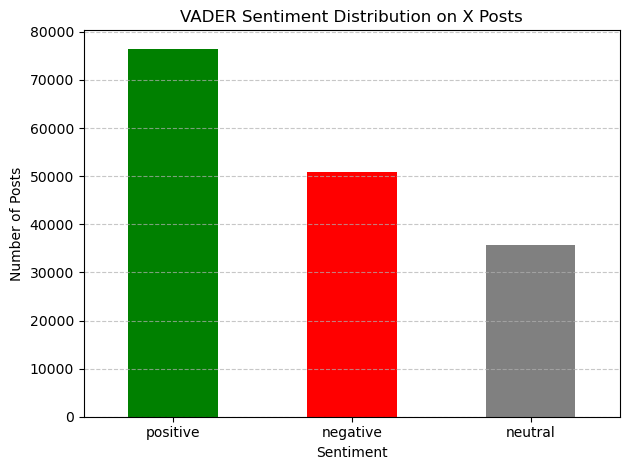

In [4]:
#Visualizations
sentiment_distribution = x_df['vader_sentiment'].value_counts()
print("Sentiment distribution from VADER:")
print(sentiment_distribution)

sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("VADER Sentiment Distribution on X Posts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
x_df = x_df.dropna(subset=['category'])

#Map original numeric sentiment to label
label_map = {1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}
x_df['original_sentiment'] = x_df['category'].map(label_map)

sentiment_distribution = x_df['vader_sentiment'].value_counts()
sentiment_distribution

vader_sentiment
positive    76490
negative    50775
neutral     35704
Name: count, dtype: int64

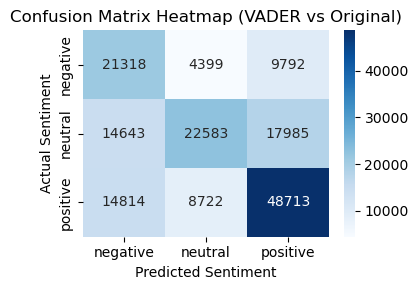

In [13]:
#Confusion Matrix
y_true = x_df['original_sentiment']
y_pred = x_df['vader_sentiment']

labels = ['negative', 'neutral', 'positive']
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix Heatmap (VADER vs Original)')
plt.tight_layout()
plt.show()

In [14]:
# Classification report
report = classification_report(y_true, y_pred, target_names=labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

    negative       0.42      0.60      0.49     35509
     neutral       0.63      0.41      0.50     55211
    positive       0.64      0.67      0.66     72249

    accuracy                           0.57    162969
   macro avg       0.56      0.56      0.55    162969
weighted avg       0.59      0.57      0.57    162969



In [9]:
accuracy = (x_df['original_sentiment'] == x_df['vader_sentiment']).mean() * 100
accuracy

56.82921291779418

## 🎯 Research Questions & Answers

**Q1: What is the overall sentiment trend in this conversation on X?**  
A1: Based on the VADER sentiment analysis, the conversation is **mostly positive**, followed by neutral and then negative. This indicates that the overall tone of the conversation is generally positive, though a significant number of negative and neutral posts are also present.

---

**Q2: How well does the VADER sentiment analyzer align with the original sentiment labels?**  
A2: The alignment between VADER sentiment and original labels is approximately **56.83% accurate**. This shows that while VADER gives a general idea of sentiment, it doesn't fully match the labeled ground truth, which is expected in rule-based models. The performance is fair but leaves room for improvement.

Confusion matrix:  
| Original Sentiment | VADER Negative | VADER Neutral | VADER Positive |
|--------------------|----------------|----------------|----------------|
| Negative           | 21,318         | 4,399          | 9,792          |
| Neutral            | 14,643         | 22,583         | 17,985         |
| Positive           | 14,814         | 8,722          | 48,713         |

---

**Q3: Can we draw conclusions about user behavior or controversy based on sentiment?**  
A3: Yes. Although the dominant sentiment is positive, the substantial number of negative posts (21,318 matched + many false positives) indicates that the conversation may have involved controversial or emotionally intense exchanges. This kind of analysis helps in identifying potential flashpoints or toxic user behavior on the platform.


## 🧾 Conclusion

In this project, we performed sentiment analysis on a dataset of X posts using the VADER Sentiment Analyzer. The main objectives were to classify posts as positive, neutral, or negative, analyze overall sentiment trends, and compare VADER's predictions against original sentiment labels.

Key findings:

- The **majority of posts were classified as positive**, indicating an overall positive tone in the conversation.
- The **VADER analyzer achieved an accuracy of approximately 56.83%** when compared to the original labeled sentiments.
- A **confusion matrix** revealed that while VADER performs reasonably well for positive sentiments, it shows moderate confusion between neutral and negative classes.
- Using evaluation metrics such as **precision, recall, and F1-score**, we observed that VADER’s performance is acceptable for a rule-based method, but could be improved with machine learning or deep learning approaches.

Overall, this analysis provides a clear understanding of the sentiment landscape of the conversation on X and highlights both the strengths and limitations of using lexicon-based sentiment analysis tools like VADER.
